In [1]:
from recycling_app.preprocessing.loading_data import create_data_loaders
from recycling_app.preprocessing.preprocessing import Preprocessor
from recycling_app.model.feature_extraction import FeatureExtractor
import os
import torch

In [2]:
# %load_ext autoreload
# %autoreload 2

In [3]:
random_seed = 125

In [4]:
preprocessor = Preprocessor()

In [5]:
dataset_path = os.path.join(os.path.dirname(os.getcwd()), "data", "raw")
os.makedirs(os.path.join(os.path.dirname(os.getcwd()), "data", "features"), exist_ok=True)
features_path = os.path.join(os.path.dirname(os.getcwd()), "data", "features")

In [6]:
train_loader, val_loader, test_loader, dataset = create_data_loaders(dataset_path=dataset_path, batch_size=16, seed=random_seed, preprocessor=preprocessor)

In [38]:
feature_extractor_resnet101 = FeatureExtractor("resnet101")

In [8]:
train_features, train_labels = feature_extractor_resnet101.extract_features(train_loader)

Extracting features:   0%|          | 0/292 [00:00<?, ?batch/s]

Extracting features: 100%|██████████| 292/292 [09:00<00:00,  1.85s/batch]


In [9]:
torch.save(train_features, os.path.join(features_path,"train_features_resnet101.pt"))
torch.save(train_labels, os.path.join(features_path, "train_labels_resnet101.pt"))

In [10]:
val_features, val_labels = feature_extractor_resnet101.extract_features(val_loader)

Extracting features: 100%|██████████| 73/73 [02:22<00:00,  1.96s/batch]


In [11]:
torch.save(val_features, os.path.join(features_path, "val_features_resnet101.pt"))
torch.save(val_labels, os.path.join(features_path, "val_labels_resnet101.pt"))

In [12]:
test_features, test_labels = feature_extractor_resnet101.extract_features(test_loader)

Extracting features: 100%|██████████| 91/91 [02:59<00:00,  1.97s/batch]


In [13]:
torch.save(test_features, os.path.join(features_path, "test_features_resnet101.pt"))
torch.save(test_labels, os.path.join(features_path, "test_labels_resnet101.pt"))

In [14]:
feature_extractor_alexnet = FeatureExtractor("alexnet")

In [15]:
train_features, train_labels = feature_extractor_alexnet.extract_features(train_loader)

Extracting features: 100%|██████████| 292/292 [01:02<00:00,  4.64batch/s]


In [16]:
torch.save(train_features, os.path.join(features_path, "train_features_alexnet.pt"))
torch.save(train_labels, os.path.join(features_path, "train_labels_alexnet.pt"))

In [17]:
val_features, val_labels = feature_extractor_alexnet.extract_features(val_loader)

Extracting features: 100%|██████████| 73/73 [00:16<00:00,  4.56batch/s]


In [18]:
torch.save(val_features, os.path.join(features_path, "val_features_alexnet.pt"))
torch.save(val_labels, os.path.join(features_path, "val_labels_alexnet.pt"))

In [19]:
test_features, test_labels = feature_extractor_alexnet.extract_features(test_loader)

Extracting features: 100%|██████████| 91/91 [00:20<00:00,  4.49batch/s]


In [20]:
torch.save(test_features, os.path.join(features_path, "test_features_alexnet.pt"))
torch.save(test_labels, os.path.join(features_path, "test_labels_alexnet.pt"))

In [21]:
feature_extractor_googlenet = FeatureExtractor("googlenet")

In [22]:
train_features, train_labels = feature_extractor_googlenet.extract_features(train_loader)

Extracting features: 100%|██████████| 292/292 [03:44<00:00,  1.30batch/s]


In [24]:
torch.save(train_features, os.path.join(features_path, "train_features_googlenet.pt"))
torch.save(train_labels, os.path.join(features_path, "train_labels_googlenet.pt"))

In [25]:
val_features, val_labels = feature_extractor_googlenet.extract_features(val_loader)

Extracting features:   0%|          | 0/73 [00:00<?, ?batch/s]

Extracting features: 100%|██████████| 73/73 [00:53<00:00,  1.38batch/s]


In [26]:
torch.save(val_features, os.path.join(features_path, "val_features_googlenet.pt"))
torch.save(val_labels, os.path.join(features_path, "val_labels_googlenet.pt"))

In [27]:
test_features, test_labels = feature_extractor_googlenet.extract_features(test_loader)

Extracting features: 100%|██████████| 91/91 [01:06<00:00,  1.37batch/s]


In [28]:
torch.save(test_features, os.path.join(features_path, "test_features_googlenet.pt"))
torch.save(test_labels, os.path.join(features_path, "test_labels_googlenet.pt"))

In [29]:
feature_extractor_vgg19 = FeatureExtractor("vgg19")

In [30]:
train_features, train_labels = feature_extractor_vgg19.extract_features(train_loader)

Extracting features: 100%|██████████| 292/292 [13:16<00:00,  2.73s/batch]


In [31]:
torch.save(train_features, os.path.join(features_path, "train_features_vgg19.pt"))
torch.save(train_labels, os.path.join(features_path, "train_labels_vgg19.pt"))

In [32]:
val_features, val_labels = feature_extractor_vgg19.extract_features(val_loader)

Extracting features: 100%|██████████| 73/73 [03:27<00:00,  2.85s/batch]


In [33]:
torch.save(val_features, os.path.join(features_path, "val_features_vgg19.pt"))
torch.save(val_labels, os.path.join(features_path,"val_labels_vgg19.pt"))

In [34]:
test_features, test_labels = feature_extractor_vgg19.extract_features(test_loader)

Extracting features: 100%|██████████| 91/91 [04:18<00:00,  2.84s/batch]


In [35]:
torch.save(test_features, os.path.join(features_path,"test_features_vgg19.pt"))
torch.save(test_labels, os.path.join(features_path, "test_labels_vgg19.pt"))

In [39]:
feature_extractor_resnet152 = FeatureExtractor("resnet152")

In [40]:
train_features, train_labels = feature_extractor_resnet152.extract_features(train_loader)

Extracting features: 100%|██████████| 292/292 [13:20<00:00,  2.74s/batch]


In [41]:
torch.save(train_features, os.path.join(features_path,"train_features_resnet152.pt"))
torch.save(train_labels, os.path.join(features_path, "train_labels_resnet152.pt"))

In [42]:
val_features, val_labels = feature_extractor_resnet152.extract_features(val_loader)

Extracting features: 100%|██████████| 73/73 [03:20<00:00,  2.74s/batch]


In [43]:
torch.save(val_features, os.path.join(features_path, "val_features_resnet152.pt"))
torch.save(val_labels, os.path.join(features_path, "val_labels_resnet152.pt"))

In [44]:
test_features, test_labels = feature_extractor_resnet152.extract_features(test_loader)

Extracting features: 100%|██████████| 91/91 [04:10<00:00,  2.75s/batch]


In [45]:
torch.save(test_features, os.path.join(features_path, "test_features_resnet152.pt"))
torch.save(test_labels, os.path.join(features_path, "test_labels_resnet152.pt"))

## Jak używać?

```python
train_features, train_labels = feature_extractor.extract_features(train_loader)
```

No i potem uczyć modele na train_features i train_labels. To samo, jeśli walidacyjny lub testowy.

In [7]:
from sklearn.linear_model import SGDClassifier # svm with stochastic gradient descent - was used in the paper
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_pred, y_true, dataset):
    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [9]:
train_features, train_labels = torch.load(os.path.join(features_path, "train_features_resnet152.pt")), torch.load(os.path.join(features_path, "train_labels_resnet152.pt"))
val_features, val_labels = torch.load(os.path.join(features_path, "val_features_resnet152.pt")), torch.load(os.path.join(features_path, "val_labels_resnet152.pt"))

C:\Users\marty\AppData\Local\Temp\ipykernel_15972\2490819412.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_features, train_labels = torch.load(os.path.join(featu

In [10]:
sgd_clf = SGDClassifier(loss='log_loss',              
    penalty='elasticnet',     
    alpha=0.0001,             
    learning_rate='adaptive', 
    eta0=0.01,                
    max_iter=1000,            
    tol=1e-3,                 
    early_stopping=True,      
    random_state=random_seed)
sgd_clf.fit(train_features, train_labels)

SGDClassifier(early_stopping=True, eta0=0.01, learning_rate='adaptive',
              loss='log_loss', penalty='elasticnet', random_state=125)

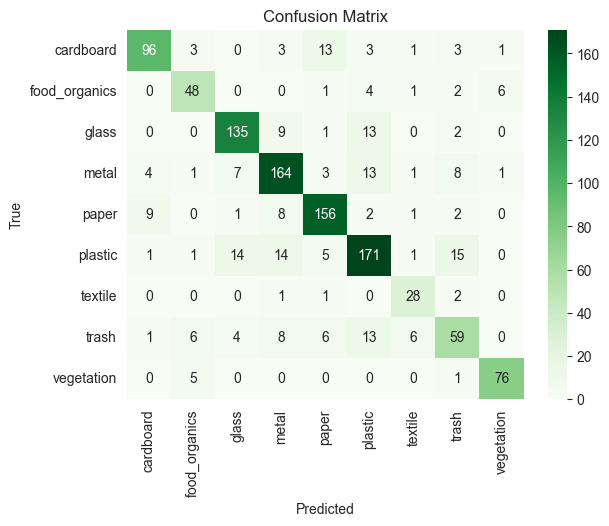

In [11]:
plot_confusion_matrix(sgd_clf.predict(val_features), val_labels, dataset)

In [12]:
print(classification_report(val_labels, sgd_clf.predict(val_features), target_names=dataset.classes))

               precision    recall  f1-score   support

    cardboard       0.86      0.78      0.82       123
food_organics       0.75      0.77      0.76        62
        glass       0.84      0.84      0.84       160
        metal       0.79      0.81      0.80       202
        paper       0.84      0.87      0.85       179
      plastic       0.78      0.77      0.78       222
      textile       0.72      0.88      0.79        32
        trash       0.63      0.57      0.60       103
   vegetation       0.90      0.93      0.92        82

     accuracy                           0.80      1165
    macro avg       0.79      0.80      0.80      1165
 weighted avg       0.80      0.80      0.80      1165


In [86]:
from sklearn.model_selection import GridSearchCV

In [100]:
sgd = SGDClassifier(random_state=random_seed)


param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],       
    'penalty': ['elasticnet'],                         
    'alpha': [0.0001, 0.001, 0.01, 0.05],             
    'learning_rate': ['adaptive'],                    
    'eta0': [0.0001, 0.001, 0.01, 0.1],               
    'max_iter': [1000, 2000, 5000],                    
    'tol': [1e-3, 1e-4],                               
    'early_stopping': [True],                          
}


grid_search = GridSearchCV(
    estimator=sgd,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=3,                
    verbose=3,           
    n_jobs=-1            
)

In [101]:
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


D:\Studia\Modeling\recycling_app\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
288 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Studia\Modeling\recycling_app\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Studia\Modeling\recycling_app\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Studia\Modeling\recycling_app\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraint

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=125), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05],
                         'early_stopping': [True],
                         'eta0': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['adaptive'],
                         'loss': ['hinge', 'log', 'modified_huber'],
                         'max_iter': [1000, 2000, 5000],
                         'penalty': ['elasticnet'], 'tol': [0.001, 0.0001]},
             scoring='accuracy', verbose=3)

In [102]:
best_model = grid_search.best_estimator_

In [103]:
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsze accuracy:", grid_search.best_score_)

Najlepsze parametry: {'alpha': 0.01, 'early_stopping': True, 'eta0': 0.001, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}
Najlepsze accuracy na walidacji (CV): 0.7933032839665164


In [104]:
val_predictions = best_model.predict(val_features)
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Accuracy na zbiorze walidacyjnym:", val_accuracy)

Accuracy na zbiorze walidacyjnym: 0.8034334763948497


In [105]:
print(classification_report(val_labels, val_predictions, target_names=dataset.classes))

               precision    recall  f1-score   support

    cardboard       0.88      0.79      0.83       123
food_organics       0.75      0.81      0.78        62
        glass       0.83      0.82      0.83       160
        metal       0.78      0.83      0.81       202
        paper       0.85      0.89      0.87       179
      plastic       0.78      0.77      0.78       222
      textile       0.70      0.81      0.75        32
        trash       0.66      0.55      0.60       103
   vegetation       0.90      0.93      0.92        82

     accuracy                           0.80      1165
    macro avg       0.79      0.80      0.79      1165
 weighted avg       0.80      0.80      0.80      1165


In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Precision: {precision_score(val_labels, val_predictions, average='weighted')}")
print(f"Recall: {recall_score(val_labels, val_predictions, average='weighted')}")
print(f"F1-Score: {f1_score(val_labels, val_predictions, average='weighted')}")
print("Accuracy:", val_accuracy)

Precision: 0.8027581124993578
Recall: 0.8034334763948497
F1-Score: 0.8020510743576981
Accuracy: 0.8034334763948497


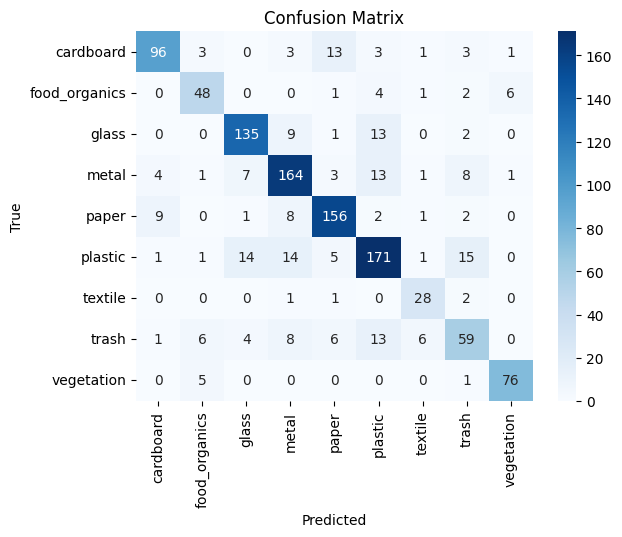

In [108]:
plot_confusion_matrix(sgd_clf.predict(val_features), val_labels, dataset)

In [109]:
train_features, train_labels = torch.load(os.path.join(features_path, "train_features_googlenet.pt")), torch.load(os.path.join(features_path, "train_labels_googlenet.pt"))
val_features, val_labels = torch.load(os.path.join(features_path, "val_features_googlenet.pt")), torch.load(os.path.join(features_path, "val_labels_googlenet.pt"))

C:\Users\marty\AppData\Local\Temp\ipykernel_2620\3886129444.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_features, train_labels = torch.load(os.path.join(featur

In [110]:
best_params = {
    'alpha': 0.01,
    'early_stopping': True,
    'eta0': 0.001,
    'learning_rate': 'adaptive',
    'loss': 'modified_huber',
    'max_iter': 1000,
    'penalty': 'elasticnet',
    'tol': 0.001
}

In [14]:
sgd_clf = SGDClassifier(**best_params, random_state=random_seed)

NameError: name 'best_params' is not defined

In [15]:
sgd_clf = SGDClassifier(random_state=random_seed)

In [16]:
sgd_clf.fit(train_features, train_labels)

val_predictions = sgd_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

ValueError: Found array with dim 4. SGDClassifier expected <= 2.

In [112]:
sgd_clf.fit(train_features, train_labels)

val_predictions = sgd_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")


Accuracy na zbiorze walidacyjnym: 0.6721


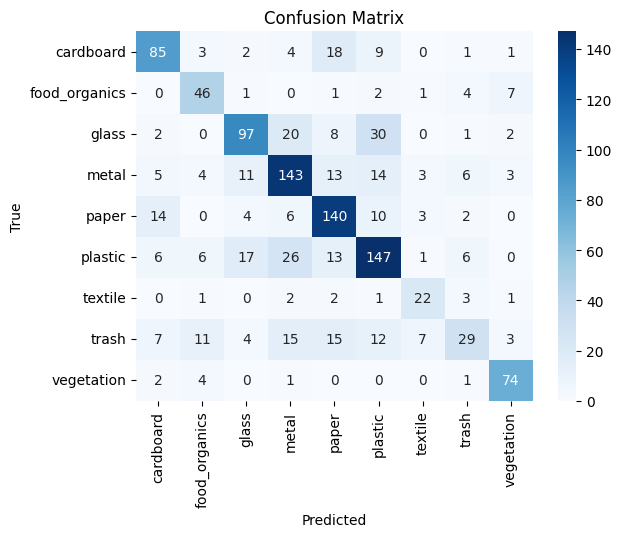

In [113]:
plot_confusion_matrix(sgd_clf.predict(val_features), val_labels, dataset)

In [4]:
train_features, train_labels = torch.load(os.path.join(features_path, "train_features_alexnet.pt")), torch.load(os.path.join(features_path, "train_labels_alexnet.pt"))
val_features, val_labels = torch.load(os.path.join(features_path, "val_features_alexnet.pt")), torch.load(os.path.join(features_path, "val_labels_alexnet.pt"))

C:\Users\marty\AppData\Local\Temp\ipykernel_18200\1205906861.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_features, train_labels = torch.load(os.path.join(featu

In [146]:
sgd_clf = SGDClassifier(**best_params, random_state=random_seed)

In [154]:
sgd_clf = SGDClassifier(**best_params, random_state=random_seed)
sgd_clf.fit(train_features, train_labels)

val_predictions = sgd_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")


Accuracy na zbiorze walidacyjnym: 0.5313


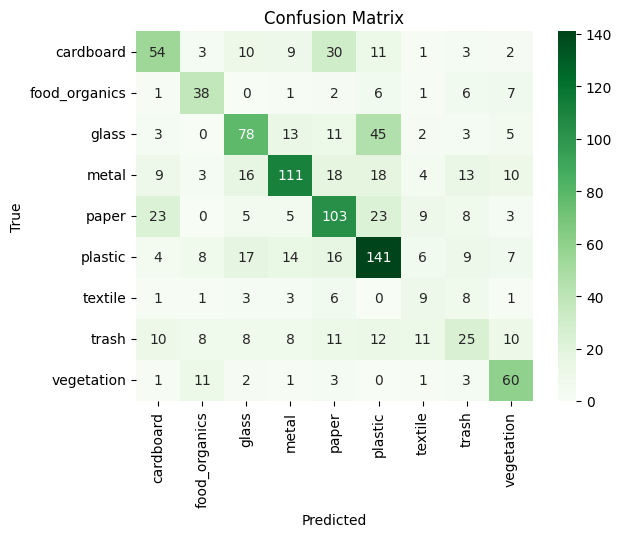

In [162]:
plot_confusion_matrix(sgd_clf.predict(val_features), val_labels, dataset)


In [163]:
train_features, train_labels = torch.load(os.path.join(features_path, "train_features_vgg19.pt")), torch.load(os.path.join(features_path, "train_labels_vgg19.pt"))
val_features, val_labels = torch.load(os.path.join(features_path, "val_features_vgg19.pt")), torch.load(os.path.join(features_path, "val_labels_vgg19.pt"))

C:\Users\marty\AppData\Local\Temp\ipykernel_2620\2757983090.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_features, train_labels = torch.load(os.path.join(featur

In [164]:
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)

In [165]:
sgd_clf = SGDClassifier(**best_params, random_state=random_seed)
sgd_clf.fit(train_features, train_labels)

val_predictions = sgd_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

Accuracy na zbiorze walidacyjnym: 0.5639


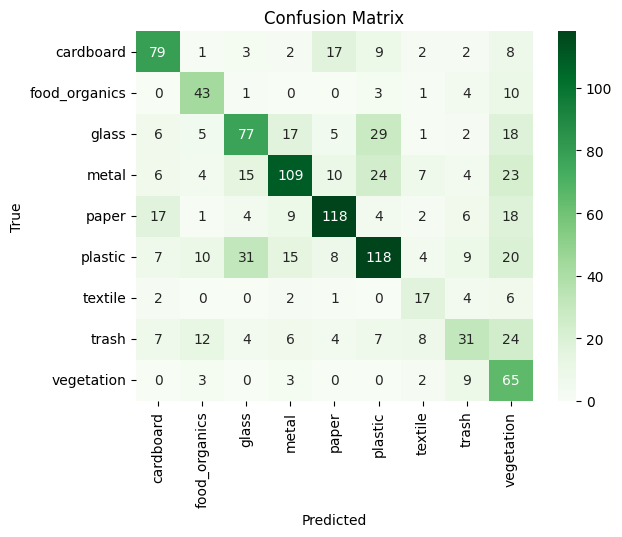

In [166]:
plot_confusion_matrix(sgd_clf.predict(val_features), val_labels, dataset)

Accuracy na zbiorze walidacyjnym: 0.6275


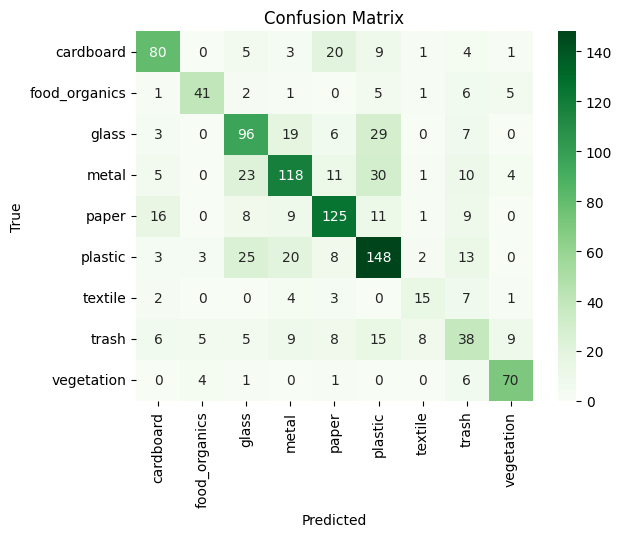

In [167]:
sgd_clf = SGDClassifier(random_state=random_seed)
sgd_clf.fit(train_features, train_labels)

val_predictions = sgd_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")
plot_confusion_matrix(sgd_clf.predict(val_features), val_labels, dataset)

In [ ]:
sgd_clf = SGDClassifier(random_state=random_seed)
sgd_clf.fit(train_features, train_labels)

val_predictions = sgd_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")
plot_confusion_matrix(sgd_clf.predict(val_features), val_labels, dataset)

Accuracy na zbiorze walidacyjnym: 0.7262


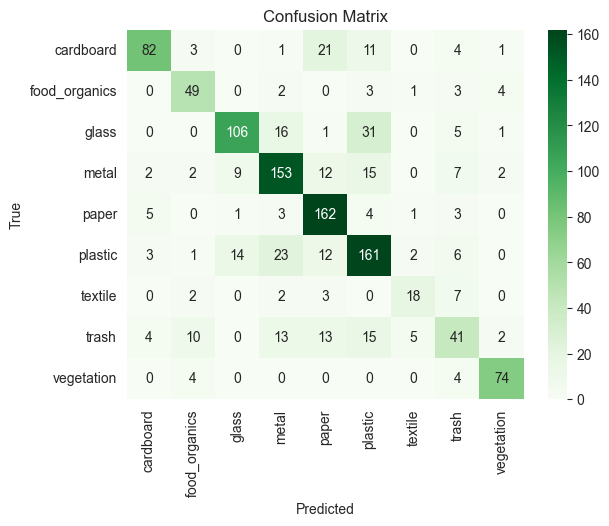

In [35]:
rf_clf = RandomForestClassifier(random_state=random_seed)
rf_clf.fit(train_features, train_labels)

val_predictions = rf_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

plot_confusion_matrix(val_predictions, val_labels, dataset)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.134409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 521346
[LightGBM] [Info] Number of data points in the train set: 4659, number of used features: 2048
[LightGBM] [Info] Start training from score -2.218045
[LightGBM] [Info] Start training from score -2.844437
[LightGBM] [Info] Start training from score -2.097417
[LightGBM] [Info] Start training from score -1.807988
[LightGBM] [Info] Start training from score -1.894048
[LightGBM] [Info] Start training from score -1.628726
[LightGBM] [Info] Start training from score -3.039384
[LightGBM] [Info] Start training from score -2.350732
[LightGBM] [Info] Start training from score -2.874402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

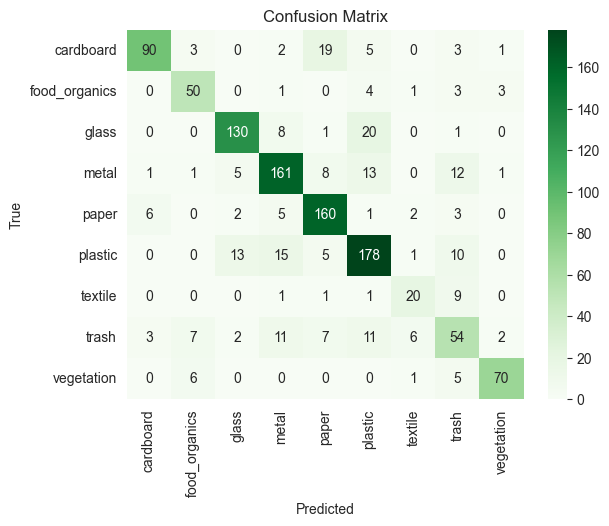

In [41]:
lgb_clf = lgb.LGBMClassifier(random_state=random_seed)
lgb_clf.fit(train_features, train_labels)

val_predictions = lgb_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

plot_confusion_matrix(val_predictions, val_labels, dataset)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.124193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 521346
[LightGBM] [Info] Number of data points in the train set: 4659, number of used features: 2048
[LightGBM] [Info] Start training from score -2.218045
[LightGBM] [Info] Start training from score -2.844437
[LightGBM] [Info] Start training from score -2.097417
[LightGBM] [Info] Start training from score -1.807988
[LightGBM] [Info] Start training from score -1.894048
[LightGBM] [Info] Start training from score -1.628726
[LightGBM] [Info] Start training from score -3.039384
[LightGBM] [Info] Start training from score -2.350732
[LightGBM] [Info] Start training

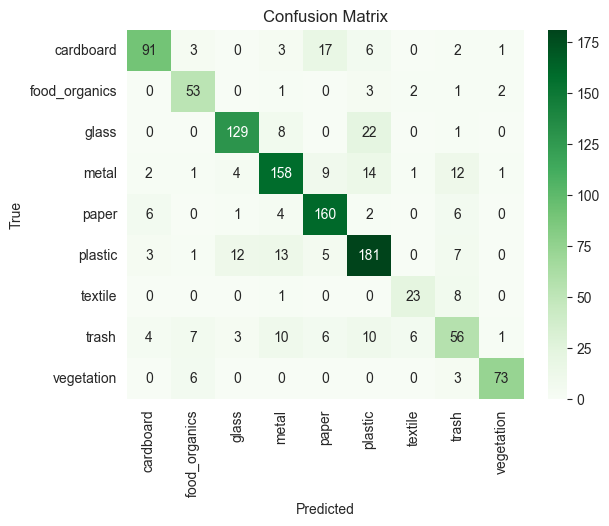

In [40]:
lgb_clf = lgb.LGBMClassifier(random_state=random_seed, min_data_in_leaf=50)
lgb_clf.fit(train_features, train_labels)

val_predictions = lgb_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

plot_confusion_matrix(val_predictions, val_labels, dataset)

In [42]:
train_features, train_labels = torch.load(os.path.join(features_path, "train_features_googlenet.pt")), torch.load(os.path.join(features_path, "train_labels_googlenet.pt"))
val_features, val_labels = torch.load(os.path.join(features_path, "val_features_googlenet.pt")), torch.load(os.path.join(features_path, "val_labels_googlenet.pt"))

C:\Users\marty\AppData\Local\Temp\ipykernel_18200\3886129444.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_features, train_labels = torch.load(os.path.join(featu

Accuracy na zbiorze walidacyjnym: 0.6584


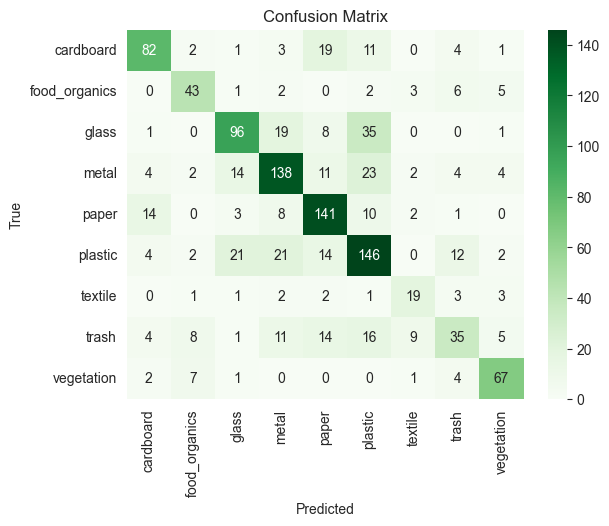

In [43]:
xgb_clf = xgb.XGBClassifier(random_state=random_seed)
xgb_clf.fit(train_features, train_labels)

val_predictions = xgb_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")
plot_confusion_matrix(xgb_clf.predict(val_features), val_labels, dataset)

Accuracy na zbiorze walidacyjnym: 0.6000


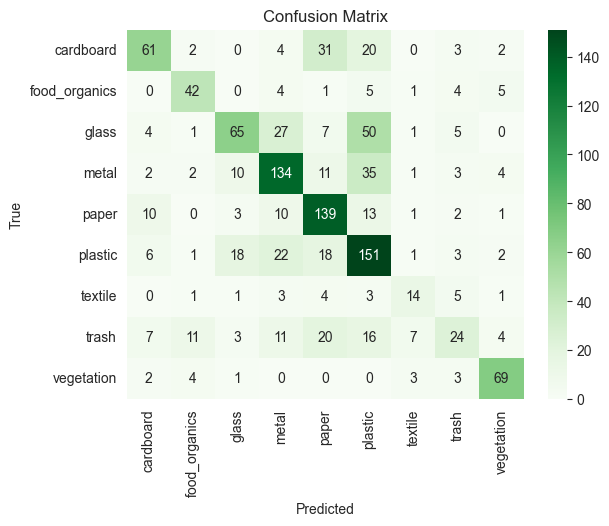

In [44]:
rf_clf = RandomForestClassifier(random_state=random_seed)
rf_clf.fit(train_features, train_labels)

val_predictions = rf_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

plot_confusion_matrix(val_predictions, val_labels, dataset)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261120
[LightGBM] [Info] Number of data points in the train set: 4659, number of used features: 1024
[LightGBM] [Info] Start training from score -2.218045
[LightGBM] [Info] Start training from score -2.844437
[LightGBM] [Info] Start training from score -2.097417
[LightGBM] [Info] Start training from score -1.807988
[LightGBM] [Info] Start training from score -1.894048
[LightGBM] [Info] Start training from score -1.628726
[LightGBM] [Info] Start training from score -3.039384
[LightGBM] [Info] Start training from score -2.350732
[LightGBM] [Info] Start training from score -2.874402
Accuracy na zbiorze walidacyjnym: 0.6489


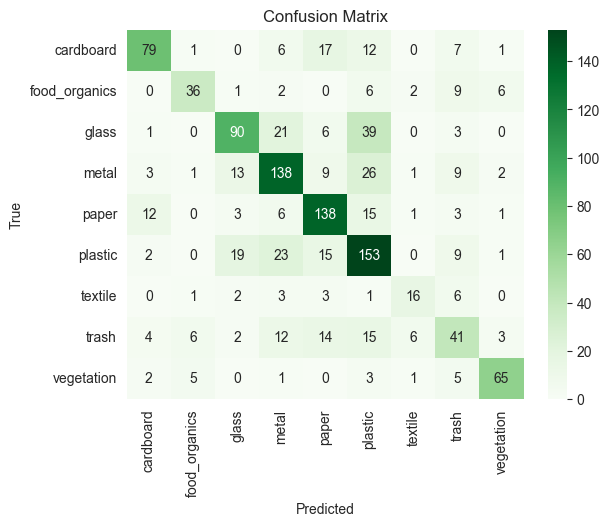

In [45]:
lgb_clf = lgb.LGBMClassifier(random_state=random_seed)
lgb_clf.fit(train_features, train_labels)

val_predictions = lgb_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

plot_confusion_matrix(val_predictions, val_labels, dataset)

In [51]:
train_features, train_labels = torch.load(os.path.join(features_path, "train_features_vgg19.pt")), torch.load(os.path.join(features_path, "train_labels_vgg19.pt"))
val_features, val_labels = torch.load(os.path.join(features_path, "val_features_vgg19.pt")), torch.load(os.path.join(features_path, "val_labels_vgg19.pt"))

C:\Users\marty\AppData\Local\Temp\ipykernel_18200\2757983090.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_features, train_labels = torch.load(os.path.join(featu

In [53]:
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)

Accuracy na zbiorze walidacyjnym: 0.6215


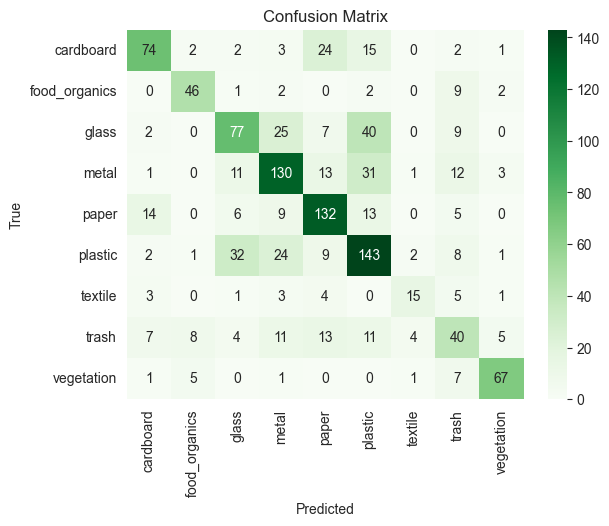

In [57]:
xgb_clf = xgb.XGBClassifier(random_state=random_seed)
xgb_clf.fit(train_features, train_labels)

val_predictions = xgb_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")
plot_confusion_matrix(xgb_clf.predict(val_features), val_labels, dataset)

Accuracy na zbiorze walidacyjnym: 0.5236


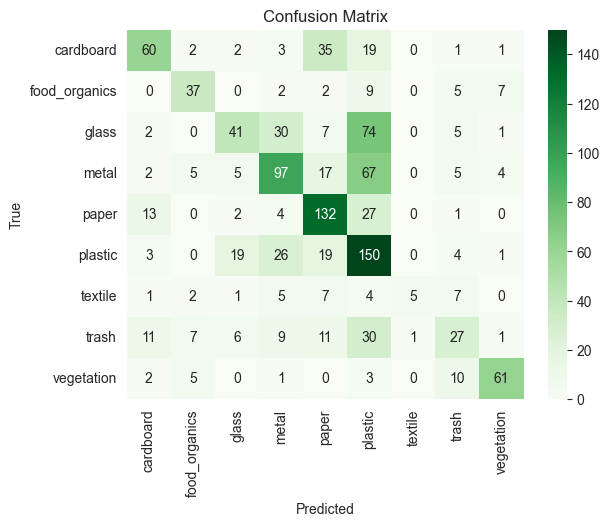

In [55]:
rf_clf = RandomForestClassifier(random_state=random_seed)
rf_clf.fit(train_features, train_labels)

val_predictions = rf_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

plot_confusion_matrix(val_predictions, val_labels, dataset)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.788915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4301759
[LightGBM] [Info] Number of data points in the train set: 4659, number of used features: 24937
[LightGBM] [Info] Start training from score -2.218045
[LightGBM] [Info] Start training from score -2.844437
[LightGBM] [Info] Start training from score -2.097417
[LightGBM] [Info] Start training from score -1.807988
[LightGBM] [Info] Start training from score -1.894048
[LightGBM] [Info] Start training from score -1.628726
[LightGBM] [Info] Start training from score -3.039384
[LightGBM] [Info] Start training from score -2.350732
[LightGBM] [Info] Start training from score -2.874402
Accuracy na zbiorze walidacyjnym: 0.6180


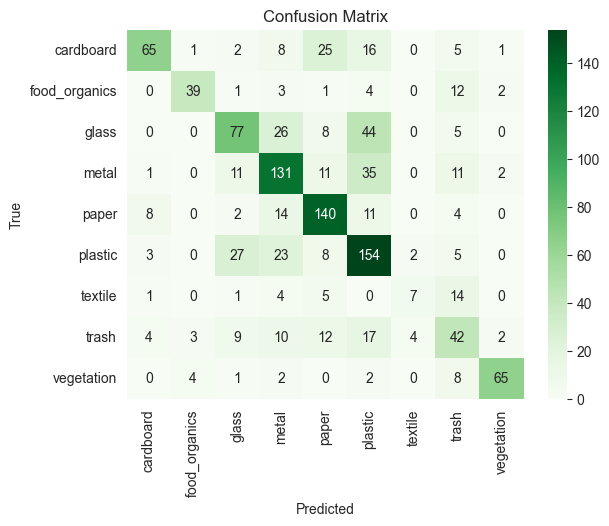

In [56]:
lgb_clf = lgb.LGBMClassifier(random_state=random_seed)
lgb_clf.fit(train_features, train_labels)

val_predictions = lgb_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

plot_confusion_matrix(val_predictions, val_labels, dataset)

In [58]:
train_features, train_labels = torch.load(os.path.join(features_path, "train_features_alexnet.pt")), torch.load(os.path.join(features_path, "train_labels_alexnet.pt"))
val_features, val_labels = torch.load(os.path.join(features_path, "val_features_alexnet.pt")), torch.load(os.path.join(features_path, "val_labels_alexnet.pt"))

C:\Users\marty\AppData\Local\Temp\ipykernel_18200\1205906861.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_features, train_labels = torch.load(os.path.join(featu

In [59]:
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)

Accuracy na zbiorze walidacyjnym: 0.5476


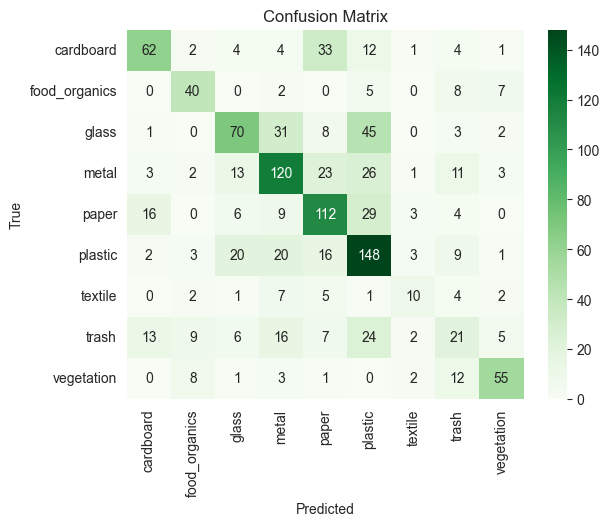

In [60]:
xgb_clf = xgb.XGBClassifier(random_state=random_seed)
xgb_clf.fit(train_features, train_labels)

val_predictions = xgb_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")
plot_confusion_matrix(xgb_clf.predict(val_features), val_labels, dataset)

Accuracy na zbiorze walidacyjnym: 0.4884


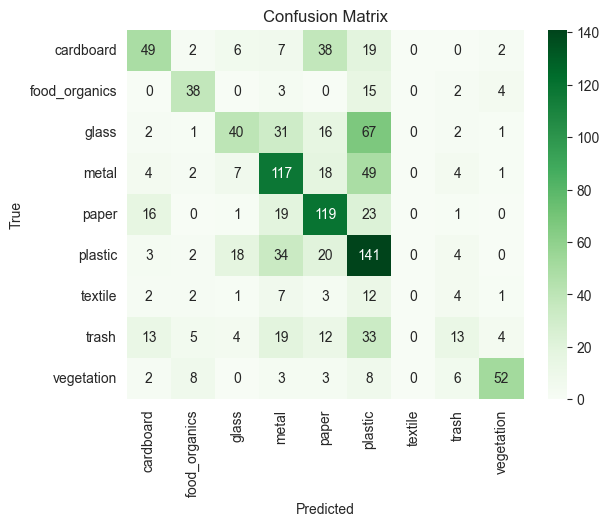

In [61]:
rf_clf = RandomForestClassifier(random_state=random_seed)
rf_clf.fit(train_features, train_labels)

val_predictions = rf_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

plot_confusion_matrix(val_predictions, val_labels, dataset)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.602007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2097234
[LightGBM] [Info] Number of data points in the train set: 4659, number of used features: 9209
[LightGBM] [Info] Start training from score -2.218045
[LightGBM] [Info] Start training from score -2.844437
[LightGBM] [Info] Start training from score -2.097417
[LightGBM] [Info] Start training from score -1.807988
[LightGBM] [Info] Start training from score -1.894048
[LightGBM] [Info] Start training from score -1.628726
[LightGBM] [Info] Start training from score -3.039384
[LightGBM] [Info] Start training from score -2.350732
[LightGBM] [Info] Start training from score -2.874402
Accuracy na zbiorze walidacyjnym: 0.5648


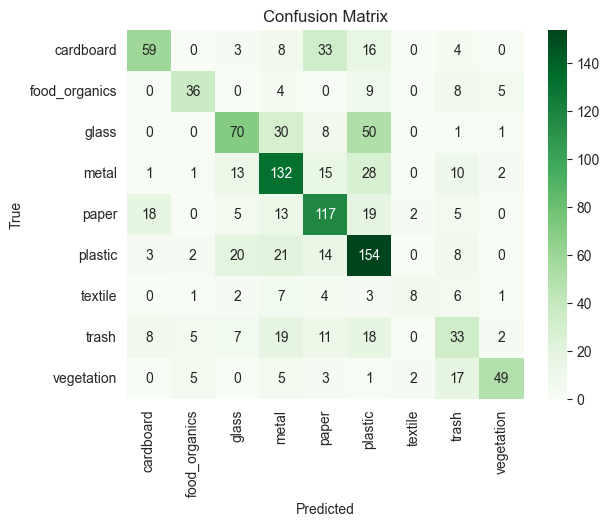

In [62]:
lgb_clf = lgb.LGBMClassifier(random_state=random_seed)
lgb_clf.fit(train_features, train_labels)

val_predictions = lgb_clf.predict(val_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy na zbiorze walidacyjnym: {val_accuracy:.4f}")

plot_confusion_matrix(val_predictions, val_labels, dataset)